In [1]:
import numpy as np
import tensorflow as tf

In [2]:
tf.__version__

'1.11.0'

In [ ]:
# 多层感知神经网络

In [5]:
import keras
from keras.utils import np_utils
from keras.datasets import mnist

In [6]:
(X_train_image,y_train_image),(X_test_image,y_test_image) = mnist.load_data()

11493376/11490434 [==============================] - 27s 2us/step

In [8]:
# 60000 个 28*28 的数字
X_train_image.shape

(60000, 28, 28)

In [9]:
y_train_image.shape

(60000,)

In [11]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image,cmap='binary')
    plt.show()

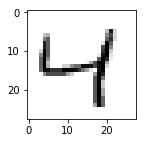

In [14]:
plot_image(X_train_image[2])

In [15]:
y_train_image[2]

4

In [27]:
def plot_multiple_image(image_list,label,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25:
        num=25
    
    for i in range(0,num):
        ax = plt.subplot(5,5,i+1)
        ax.imshow(image_list[idx],cmap='binary')
        title = 'label = '+str(label[idx])
        if len(prediction)>0:
            title=title+ ' prediction = '+ str(prediction[idx])
        idx+=1
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
        
    

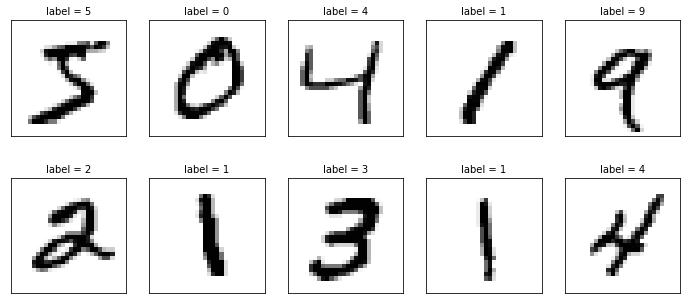

In [29]:
plot_multiple_image(X_train_image,y_train_image,[],0,10)

In [21]:
X_train = X_train_image.reshape(60000,28*28).astype('float32')
X_test = X_test_image.reshape(10000,28*28).astype('float32')

In [22]:
X_train.shape

(60000, 784)

In [23]:
X_train.max()

255.0

In [24]:
X_train_normal = X_train/255
X_test_normal = X_test/255

In [25]:
X_train_normal

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
X_train_normal[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
y_train_onehot = np_utils.to_categorical(y_train_image)
y_test_onehot = np_utils.to_categorical(y_test_image)

In [33]:
y_train_image[0]

5

In [34]:
y_train_onehot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [35]:
np.random.seed(10)

In [62]:
from keras.models import Sequential
from keras.layers import Dense

In [63]:
model = Sequential()

In [64]:
model.add(
    Dense(units=256,
    input_dim=28*28,
    kernel_initializer='normal',
    activation='relu')
)

In [65]:
model.add(
Dense(
units=10,
    kernel_initializer='normal',
    activation='softmax'
)
)

In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(
loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [68]:
train_history = model.fit(
    x=X_train_normal,
    y=y_train_onehot,
    validation_split=0.2,
    epochs=10,
    batch_size=200,
    verbose=2,
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.4394 - acc: 0.8834 - val_loss: 0.2260 - val_acc: 0.9369
Epoch 2/10
 - 1s - loss: 0.1940 - acc: 0.9451 - val_loss: 0.1626 - val_acc: 0.9542
Epoch 3/10
 - 1s - loss: 0.1391 - acc: 0.9597 - val_loss: 0.1302 - val_acc: 0.9628
Epoch 4/10
 - 1s - loss: 0.1064 - acc: 0.9698 - val_loss: 0.1111 - val_acc: 0.9688
Epoch 5/10
 - 1s - loss: 0.0855 - acc: 0.9758 - val_loss: 0.1012 - val_acc: 0.9706
Epoch 6/10
 - 1s - loss: 0.0689 - acc: 0.9810 - val_loss: 0.0930 - val_acc: 0.9711
Epoch 7/10
 - 1s - loss: 0.0571 - acc: 0.9847 - val_loss: 0.0914 - val_acc: 0.9717
Epoch 8/10
 - 1s - loss: 0.0483 - acc: 0.9866 - val_loss: 0.0904 - val_acc: 0.9732
Epoch 9/10
 - 1s - loss: 0.0401 - acc: 0.9894 - val_loss: 0.0836 - val_acc: 0.9753
Epoch 10/10
 - 1s - loss: 0.0331 - acc: 0.9915 - val_loss: 0.0792 - val_acc: 0.9766


In [71]:
# 显示训练过程
%matplotlib inline
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
#     plt.ylim([0.97,1])
    plt.show()

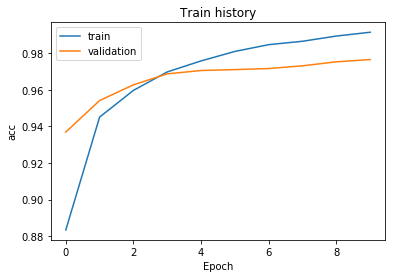

In [72]:
show_train_history(train_history,'acc','val_acc')

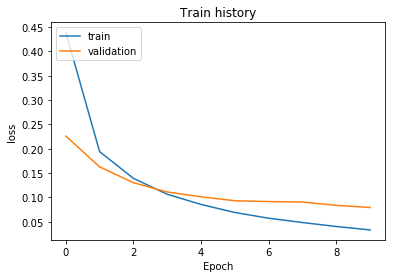

In [73]:
show_train_history(train_history,'loss','val_loss')

In [76]:
score = model.evaluate(X_test_normal,y_test_onehot)
print('end')
print('accuracy=',score[1])

10000/10000 [==============================] - 0s 22us/step
end
accuracy= 0.9788


In [77]:
prediction = model.predict_classes(X_test)

In [78]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

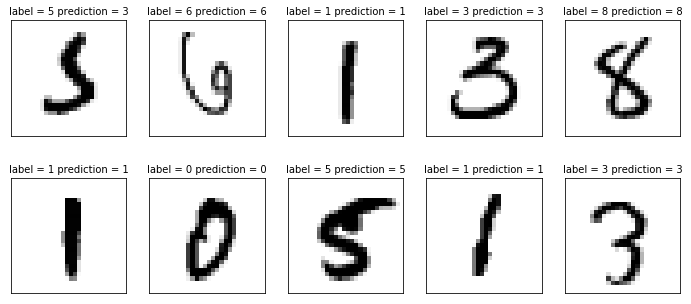

In [81]:
plot_multiple_image(X_test_image,y_test_image,prediction,340,10)

In [83]:
import pandas as pd
pd.crosstab(y_test_image,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,968,0,1,3,1,1,2,1,2,1
1,0,1123,4,0,0,1,3,0,4,0
2,4,1,1003,8,0,0,3,4,9,0
3,0,0,0,1000,0,1,0,3,4,2
4,2,0,3,1,951,0,4,3,2,16
5,3,0,0,17,1,856,6,1,4,4
6,5,2,3,1,4,3,939,0,1,0
7,0,6,10,5,0,0,0,989,3,15
8,2,0,3,8,0,2,3,2,952,2


In [84]:
df = pd.DataFrame({'label':y_test_image,'predict':prediction})

In [85]:
df[:5]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [93]:
diff_df = df[df['label']!=df['predict']]

In [94]:
diff_df

,label,predict
115,4,9
247,4,6
259,6,0
321,2,7
340,5,3
445,6,0
495,8,2
582,8,2
613,2,8
619,1,8


In [95]:
diff_df['label'].value_counts()

7    39
5    36
4    31
9    29
2    29
8    22
6    19
1    12
0    12
3    10
Name: label, dtype: int64

In [96]:
diff_df['predict'].value_counts()

3    53
9    40
8    31
2    24
6    22
0    17
7    16
1    14
4    12
5    10
Name: predict, dtype: int64

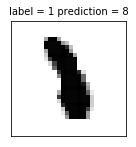

In [99]:
plot_multiple_image(X_test_image,y_test_image,prediction,619,1)

In [107]:
# 添加一个dropout功能
# 隐藏层 使用1000个神经元
from keras.layers import Dropout

model = Sequential()
model.add(
Dense(units=1000,
      input_dim=28*28,
      activation='relu',
      kernel_initializer='normal',
)
)


model.add(
Dropout(0.5)
)

# 多加一个隐藏层


model.add(
Dense(units=1000,
      activation='relu',
      kernel_initializer='normal',
)
)


model.add(
Dropout(0.5)
)


model.add(
Dense(
activation='softmax',
    kernel_initializer='normal',
    units=10,
)
)


print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [108]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history = model.fit(X_train_normal,y_train_onehot,verbose=2,epochs=10,batch_size=200,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 16s - loss: 0.3739 - acc: 0.8835 - val_loss: 0.1304 - val_acc: 0.9591
Epoch 2/10
 - 13s - loss: 0.1604 - acc: 0.9509 - val_loss: 0.1010 - val_acc: 0.9698
Epoch 3/10
 - 14s - loss: 0.1215 - acc: 0.9623 - val_loss: 0.0903 - val_acc: 0.9719
Epoch 4/10
 - 13s - loss: 0.1000 - acc: 0.9684 - val_loss: 0.0803 - val_acc: 0.9757
Epoch 5/10
 - 13s - loss: 0.0844 - acc: 0.9732 - val_loss: 0.0806 - val_acc: 0.9753
Epoch 6/10
 - 13s - loss: 0.0766 - acc: 0.9768 - val_loss: 0.0777 - val_acc: 0.9771
Epoch 7/10
 - 13s - loss: 0.0673 - acc: 0.9780 - val_loss: 0.0863 - val_acc: 0.9758
Epoch 8/10
 - 13s - loss: 0.0611 - acc: 0.9809 - val_loss: 0.0724 - val_acc: 0.9795
Epoch 9/10
 - 14s - loss: 0.0552 - acc: 0.9818 - val_loss: 0.0754 - val_acc: 0.9793
Epoch 10/10
 - 14s - loss: 0.0543 - acc: 0.9822 - val_loss: 0.0759 - val_acc: 0.9784


In [109]:
socre= model.evaluate(X_test_normal,y_test_onehot)
print('accuracy = ',socre[1])

10000/10000 [==============================] - 1s 149us/step

In [ ]:
# 极限就是0.98 的精确